# Importation des libreries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *

# Lecture du dataset

In [2]:
dataset = pd.read_csv("C46-Diabetes.csv")
dataset.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [22]:
# dataset = dataset.drop(["SkinThickness"],axis=1)
dataset = dataset.drop(["Insulin","SkinThickness"],axis=1)
dataset.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


#  Verification de L'integrité du dataset

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


# Preparation des donnée

In [24]:
exp_clf = setup(dataset, target="Outcome",train_size=0.8,normalize=True,normalize_method="minmax")

,Description,Value
0,Session id,4942
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 7)"
4,Transformed data shape,"(768, 7)"
5,Transformed train set shape,"(614, 7)"
6,Transformed test set shape,"(154, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


#  Comparaison des modeles

In [25]:
compare_models(sort = "Accuracy")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7865,0.8371,0.5372,0.7933,0.6334,0.4918,0.5148,0.9450
lda,Linear Discriminant Analysis,0.7833,0.8395,0.5797,0.7503,0.6481,0.4963,0.5090,1.0370
ridge,Ridge Classifier,0.7816,0.0000,0.5608,0.7620,0.6394,0.4888,0.5053,1.1310
svm,SVM - Linear Kernel,0.7767,0.0000,0.6606,0.7182,0.6725,0.5062,0.5210,1.3710
rf,Random Forest Classifier,0.7751,0.8318,0.5978,0.7145,0.6476,0.4851,0.4916,1.1990
ada,Ada Boost Classifier,0.7734,0.8340,0.5976,0.7188,0.6447,0.4818,0.4917,1.1340
et,Extra Trees Classifier,0.7734,0.8416,0.6069,0.7028,0.6489,0.4836,0.4881,0.9870
gbc,Gradient Boosting Classifier,0.7718,0.8499,0.6165,0.7010,0.6522,0.4841,0.4892,1.3480
lightgbm,Light Gradient Boosting Machine,0.7687,0.8313,0.6303,0.6890,0.6540,0.4814,0.4862,0.9540
nb,Naive Bayes,0.7669,0.8358,0.6266,0.6913,0.6505,0.4774,0.4847,1.5190


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4942, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
best_model = create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8548,0.8625,0.6364,0.9333,0.7568,0.6585,0.6830
1,0.7742,0.8489,0.5000,0.7857,0.6111,0.4629,0.4863
2,0.8226,0.8580,0.5909,0.8667,0.7027,0.5826,0.6043
3,0.7903,0.8989,0.4545,0.9091,0.6061,0.4840,0.5380
4,0.7869,0.8583,0.4286,0.9000,0.5806,0.4609,0.5179
5,0.8033,0.8083,0.6190,0.7647,0.6842,0.5436,0.5500
6,0.7869,0.8262,0.6190,0.7222,0.6667,0.5114,0.5147
7,0.7049,0.7238,0.3810,0.6154,0.4706,0.2814,0.2970
8,0.7705,0.8560,0.6667,0.6667,0.6667,0.4917,0.4917


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [27]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4942, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# On tune le modele

In [28]:
tuned_best_model = tune_model(best_model,choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8387,0.8636,0.5909,0.9286,0.7222,0.6163,0.6476
1,0.7742,0.8511,0.5000,0.7857,0.6111,0.4629,0.4863
2,0.8226,0.8580,0.5909,0.8667,0.7027,0.5826,0.6043
3,0.7903,0.8989,0.4545,0.9091,0.6061,0.4840,0.5380
4,0.7869,0.8560,0.4286,0.9000,0.5806,0.4609,0.5179
5,0.8033,0.8048,0.6190,0.7647,0.6842,0.5436,0.5500
6,0.7869,0.8238,0.6190,0.7222,0.6667,0.5114,0.5147
7,0.7049,0.7250,0.3810,0.6154,0.4706,0.2814,0.2970
8,0.7869,0.8560,0.6667,0.7000,0.6829,0.5226,0.5229


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [10]:
#On constate une diminution de l accuracy après l optimisation


# Visualisation

### Visualisation d e l'importance des variables

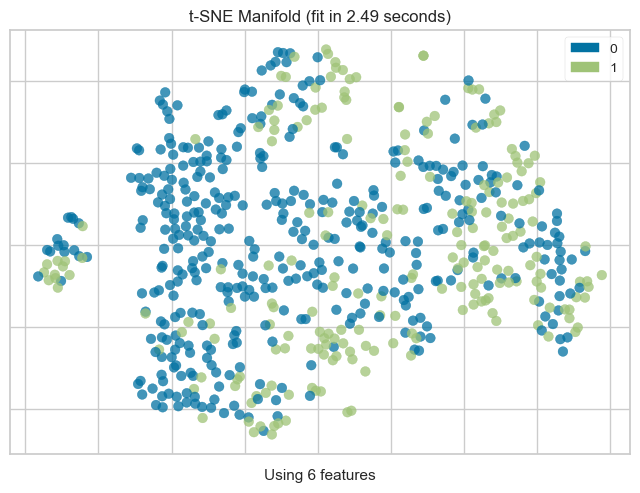

In [29]:
plot_model(best_model, plot='manifold')

In [12]:
# interpret_model(best_model)

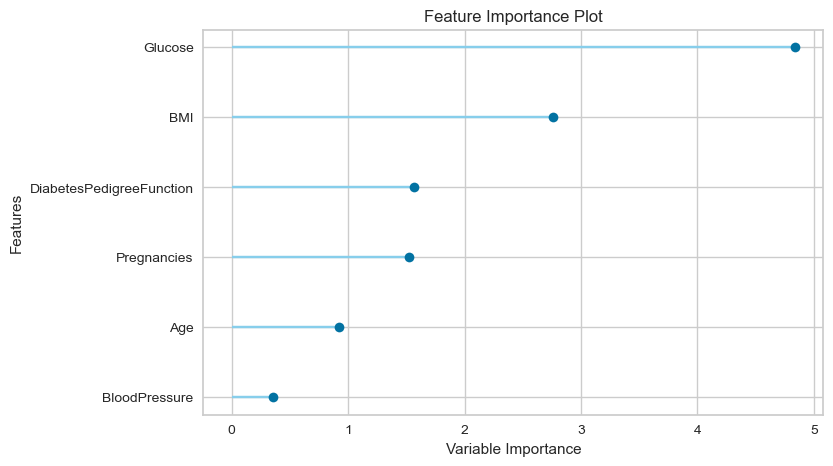

In [30]:
plot_model(best_model, plot='feature')

### Confusion Matrix

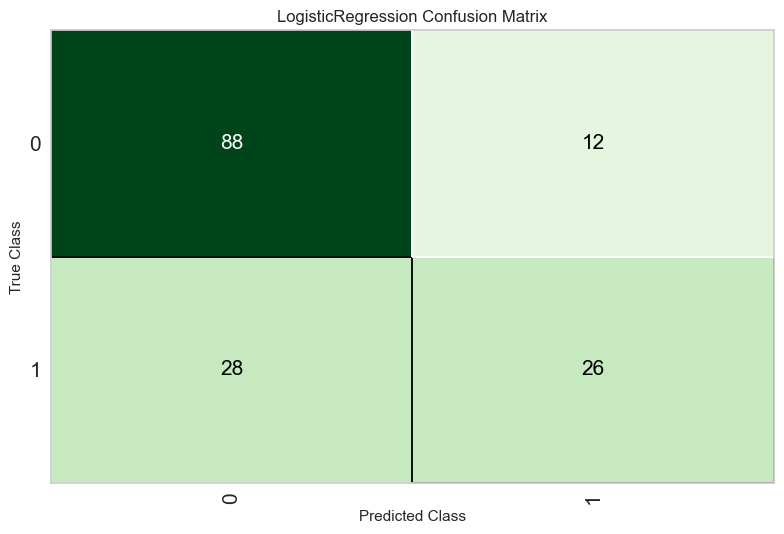

In [31]:
plot_model(best_model, plot = 'confusion_matrix')

### AUROC Plot

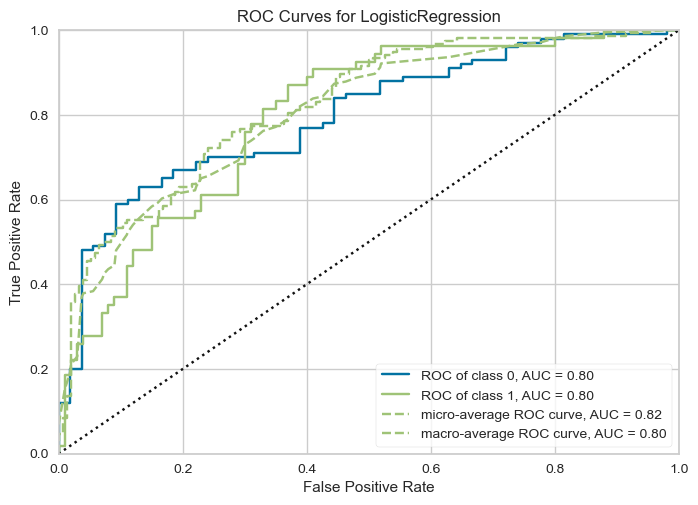

In [32]:
#Visualiser le modèle
plot_model(best_model,plot="auc")

###  Precision Recall Plot

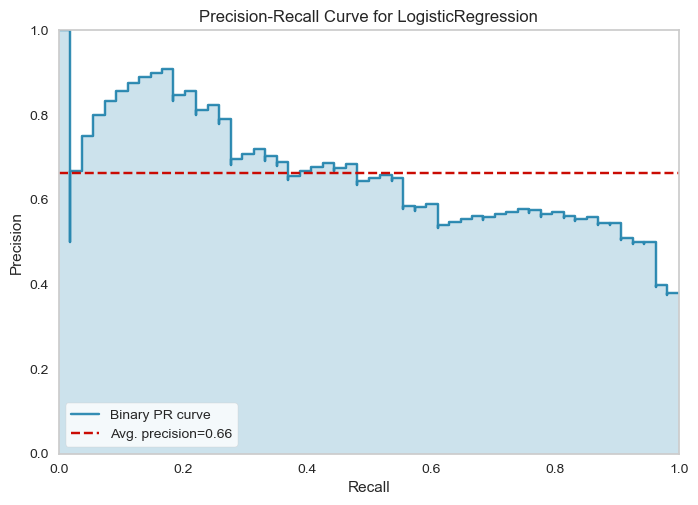

In [33]:
plot_model(best_model, plot = 'pr')

# Prediction sur le dataset

In [34]:
predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7403,0.7963,0.4815,0.6842,0.5652,0.3879,0.4001


,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_label,prediction_score
446,1,100,72,25.299999,0.658,28,0,0,0.8572
157,1,109,56,25.200001,0.833,23,0,0,0.8139
8,2,197,70,30.500000,0.158,53,1,1,0.7146
646,1,167,74,23.400000,0.447,33,1,0,0.5849
208,1,96,64,33.200001,0.289,21,0,0,0.8668
...,...,...,...,...,...,...,...,...,...
649,0,107,60,26.400000,0.133,23,0,0,0.8908
81,2,74,0,0.000000,0.102,22,0,0,0.9793
569,0,121,66,34.299999,0.203,33,1,0,0.7665
41,7,133,84,40.200001,0.696,37,0,1,0.5985


# Savegarde le model

In [37]:
final_gbc = finalize_model(best_model)

In [38]:
# save_model(best_model,'Final_diabetes_model_4Avril2022')
import pickle
file = 'Final_diabetes_model.sav'
pickle.dump(final_gbc,open(file,'wb'))